#Thiết lập và cài đặt môi trường

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# List the contents of the folder
print(os.listdir())

['.config', 'drive', 'sample_data']


In [4]:
# Change the path to the folder you want to access
folder_path = '/content/drive/MyDrive/Lab02_Visualization'

# Change the current working directory to the specified folder
os.chdir(folder_path)

# List the contents of the folder
print(os.listdir())

['Netflix_Dataset_Movie.csv', 'Netflix_Dataset_Rating.csv', '21127191_21127592.ipynb', '21127191_21127592.gdoc', 'Lab02.ipynb']


#Xử lý dữ liệu

##Đọc dữ liệu

In [5]:
# Change the path to the CSV file you want to read
csv_movie = 'Netflix_Dataset_Movie.csv'
csv_rating = 'Netflix_Dataset_Rating.csv'

# Read the CSV file into a pandas DataFrame
df_movie = pd.read_csv(csv_movie)
df_rating = pd.read_csv(csv_rating)

##Khám phá thông tin cơ bản

Quan sát một vài dòng dữ liệu

In [6]:
df_movie.head()

,Movie_ID,Year,Name
0,1,2003,Dinosaur Planet
1,2,2004,Isle of Man TT 2004 Review
2,3,1997,Character
3,4,1994,Paula Abdul's Get Up & Dance
4,5,2004,The Rise and Fall of ECW


In [7]:
df_rating.head()

,User_ID,Rating,Movie_ID
0,712664,5,3
1,1331154,4,3
2,2632461,3,3
3,44937,5,3
4,656399,4,3


Kiểu dữ liệu

In [8]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17770 entries, 0 to 17769
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Movie_ID  17770 non-null  int64 
 1   Year      17770 non-null  int64 
 2   Name      17770 non-null  object
dtypes: int64(2), object(1)
memory usage: 416.6+ KB


In [9]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17337458 entries, 0 to 17337457
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   User_ID   int64
 1   Rating    int64
 2   Movie_ID  int64
dtypes: int64(3)
memory usage: 396.8 MB


Kích thước

In [10]:
df_movie.shape

(17770, 3)

In [11]:
df_rating.shape

(17337458, 3)

Giá trị

In [12]:
df_movie.describe()

,Movie_ID,Year
count,17770.000000,17770.000000
mean,8885.500000,1990.235566
std,5129.901477,16.564501
min,1.000000,1915.000000
25%,4443.250000,1985.000000
50%,8885.500000,1997.000000
75%,13327.750000,2002.000000
max,17770.000000,2005.000000


In [13]:
df_rating.describe()

,User_ID,Rating,Movie_ID
count,1.733746e+07,1.733746e+07,1.733746e+07
mean,1.321158e+06,3.590570e+00,2.302783e+03
std,7.646923e+05,1.062665e+00,1.303458e+03
min,6.000000e+00,1.000000e+00,3.000000e+00
25%,6.602280e+05,3.000000e+00,1.176000e+03
50%,1.316775e+06,4.000000e+00,2.342000e+03
75%,1.983213e+06,4.000000e+00,3.433000e+03
max,2.649429e+06,5.000000e+00,4.496000e+03


##Kiểm tra dữ liệu

Trùng lặp

In [14]:
# Check for duplicates in the movie DataFrame
movie_index = df_movie.index
movie_dedup_series = movie_index.duplicated(keep='first')
movie_num_duplicates = movie_dedup_series.sum()

if movie_num_duplicates == 0:
    print("The movie data does not have any duplicate rows.")
else:
    print(f"The movie data has {movie_num_duplicates} duplicate rows.")

The movie data does not have any duplicate rows.


In [15]:
# Check for duplicates in the rating DataFrame
rating_index = df_rating.index
rating_dedup_series = rating_index.duplicated(keep='first')
rating_num_duplicates = rating_dedup_series.sum()

if rating_num_duplicates == 0:
    print("The rating data does not have any duplicate rows.")
else:
    print(f"The rating data has {rating_num_duplicates} duplicate rows.")

The rating data does not have any duplicate rows.


Mất dữ liệu

In [16]:
# Check for missing values in the movie DataFrame
movie_missing = df_movie.isna().sum()
movie_missing_rate = (movie_missing / len(df_movie)) * 100
movie_columns_with_missing = movie_missing_rate[movie_missing_rate > 0]
print("Missing values in movie data:")
print(movie_columns_with_missing)

Missing values in movie data:
Series([], dtype: float64)


In [17]:
# Check for missing values in the rating DataFrame
rating_missing = df_rating.isna().sum()
rating_missing_rate = (rating_missing / len(df_rating)) * 100
rating_columns_with_missing = rating_missing_rate[rating_missing_rate > 0]
print("\nMissing values in rating data:")
print(rating_columns_with_missing)


Missing values in rating data:
Series([], dtype: float64)


##Thêm cột dữ liệu

In [18]:
# Create a new column 'Decade' that represents the decade for each movie
df_movie['Decade'] = (df_movie['Year'] // 10) * 10

# Display the updated DataFrame
df_movie.head()

,Movie_ID,Year,Name,Decade
0,1,2003,Dinosaur Planet,2000
1,2,2004,Isle of Man TT 2004 Review,2000
2,3,1997,Character,1990
3,4,1994,Paula Abdul's Get Up & Dance,1990
4,5,2004,The Rise and Fall of ECW,2000


#Phân tích

##Số lượng bộ phim theo thập kỉ

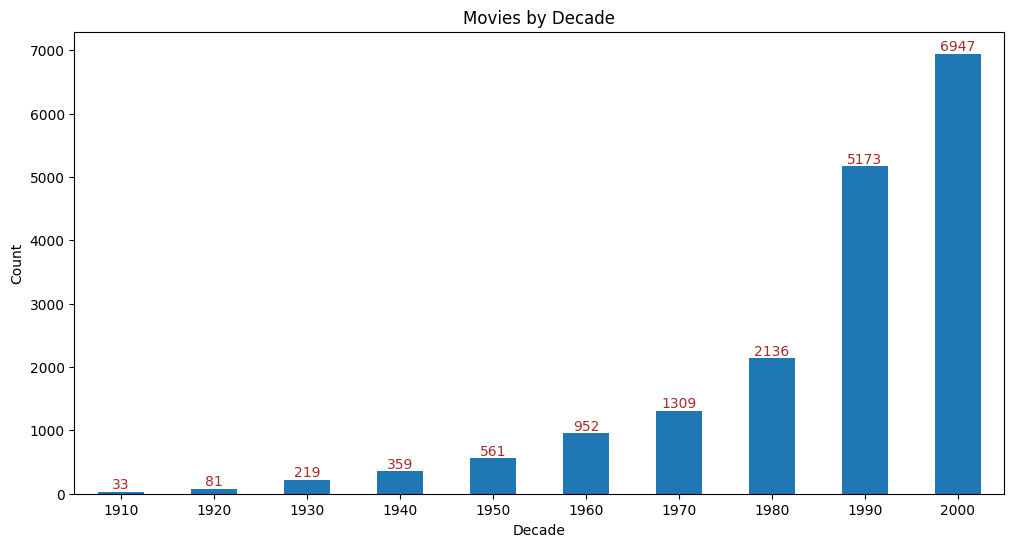

In [19]:
# Get the decade distribution
decade_distribution = df_movie['Decade'].value_counts().sort_index()

# Create the bar chart
plt.figure(figsize=(12, 6))
decade_distribution.plot(kind='bar')

plt.title('Movies by Decade')
plt.xlabel('Decade')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Add the value above each bar
for i, v in enumerate(decade_distribution):
    plt.text(i, v, str(v), color='brown', fontweight='light', ha='center', va='bottom')

plt.show()

##Phân bố đánh giá

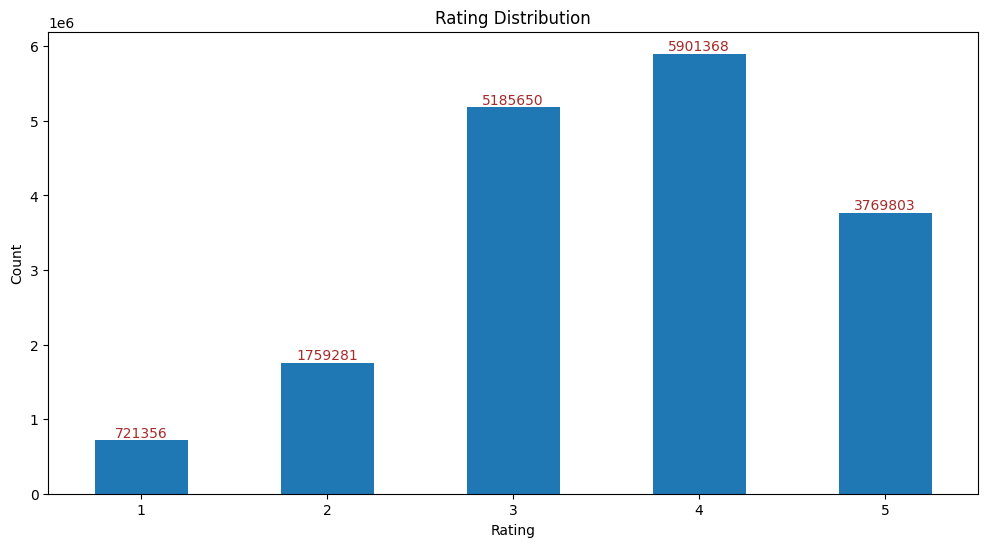

In [20]:
# Get the rating distribution
rating_distribution = df_rating['Rating'].value_counts().sort_index()

# Create the bar chart
plt.figure(figsize=(12, 6))
rating_distribution.plot(kind='bar')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Add the value above each bar
for i, v in enumerate(rating_distribution):
    plt.text(i, v, str(v), color='brown', fontweight='light', ha='center', va='bottom')

plt.show()

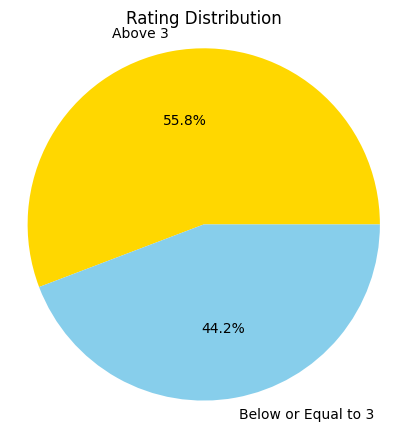

In [21]:
# Divide the ratings into two groups
above_3 = (df_rating['Rating'] > 3).sum()
below_equal_3 = (df_rating['Rating'] <= 3).sum()

# Create the pie chart
labels = ['Above 3', 'Below or Equal to 3']
sizes = [above_3, below_equal_3]
colors = ['gold', 'skyblue']

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Rating Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is circular.
plt.show()

##Tương quan giữa các biến định lượng

In [22]:
# Merge df_movie and df_rating on 'Movie_ID'
df_merged = pd.merge(df_movie, df_rating, on='Movie_ID')
df_merged.head()

,Movie_ID,Year,Name,Decade,User_ID,Rating
0,3,1997,Character,1990,712664,5
1,3,1997,Character,1990,1331154,4
2,3,1997,Character,1990,2632461,3
3,3,1997,Character,1990,44937,5
4,3,1997,Character,1990,656399,4


In [23]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17337458 entries, 0 to 17337457
Data columns (total 6 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   Movie_ID  int64 
 1   Year      int64 
 2   Name      object
 3   Decade    int64 
 4   User_ID   int64 
 5   Rating    int64 
dtypes: int64(5), object(1)
memory usage: 793.6+ MB


In [24]:
num_list = [col for col in df_merged.dtypes[df_merged.dtypes != 'object'].index if 'ID' not in col]
num_list

['Year', 'Decade', 'Rating']

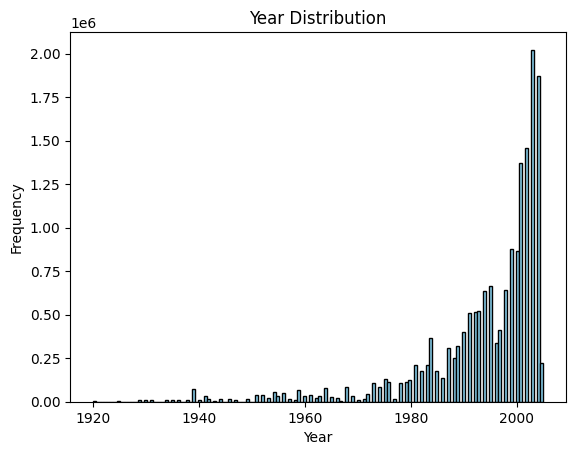

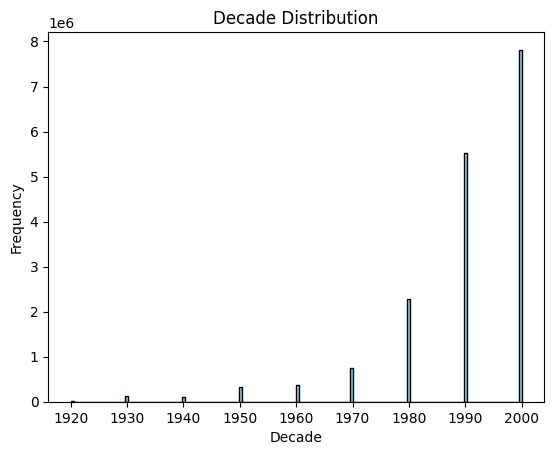

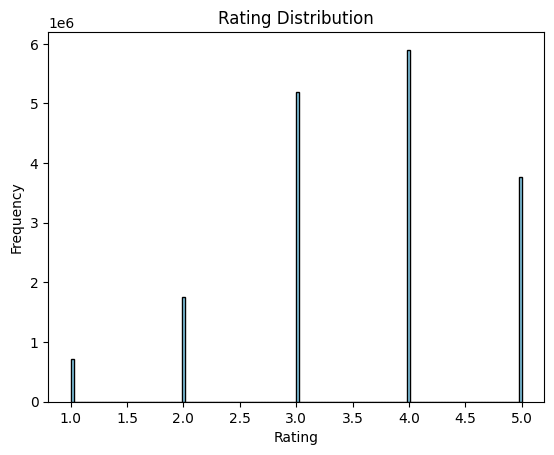

In [25]:
for i in range(len(num_list)):
  plt.hist(df_merged[num_list[i]], bins=150, color='skyblue', edgecolor='black')
  plt.title(num_list[i] +' Distribution')
  plt.xlabel(num_list[i])
  plt.ylabel('Frequency')
  plt.show()

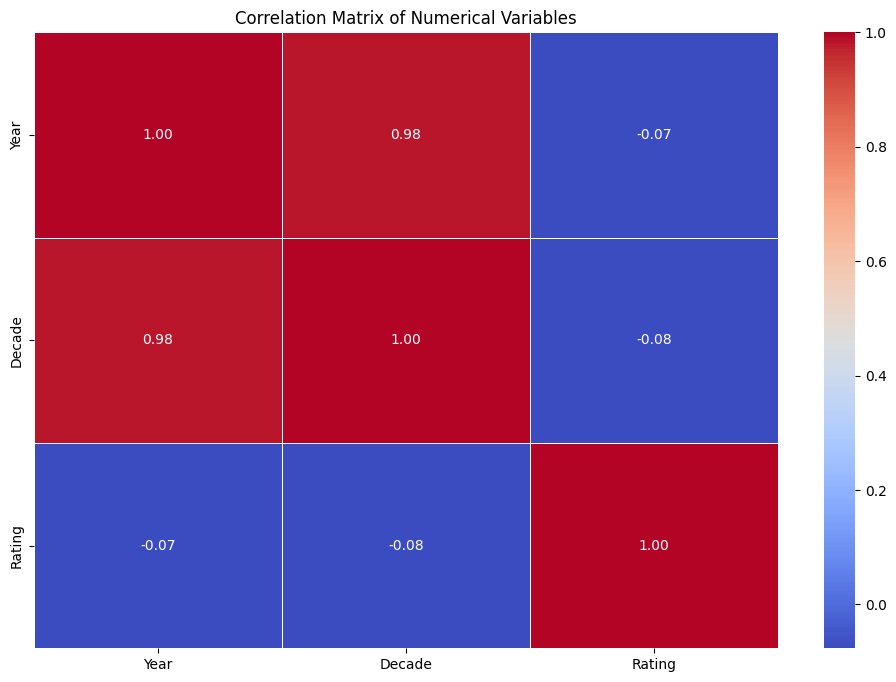

In [26]:
correlation_matrix = df_merged[num_list].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

##Đánh giá trung bình theo thập kỉ

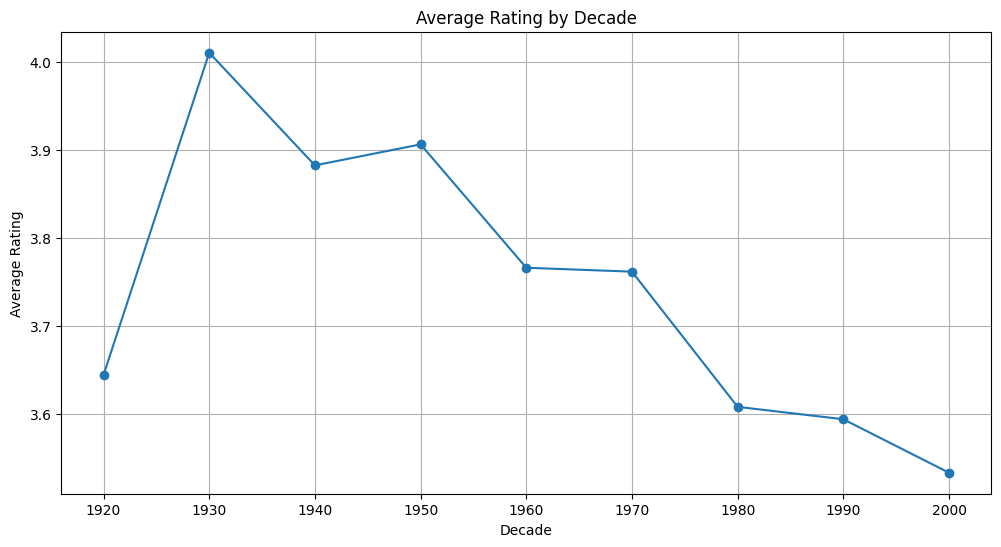

In [27]:
# Compute the average rating for each decade
decade_avg_rating = df_merged.groupby('Decade')['Rating'].mean().sort_index()

# Create the line graph
plt.figure(figsize=(12, 6))
decade_avg_rating.plot(kind='line', marker='o')
plt.title('Average Rating by Decade')
plt.xlabel('Decade')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)
plt.grid(True)

plt.show()

In [28]:
# Display the results
print(decade_avg_rating)

Decade
1920    3.644350
1930    4.010075
1940    3.882224
1950    3.906045
1960    3.766029
1970    3.761581
1980    3.608146
1990    3.594061
2000    3.533370
Name: Rating, dtype: float64
